In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("class_MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# 5D distribution
gauss2_cauchy1_gauss2 = function (theta) {

    sigmas = c(2.5, 4.3, 0, 3.5, 5)
    centers = c(0.4, 9, 0, -4.7, 2.9)

    product = 1
    for (i in 1:2) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    product = product * (dcauchy(theta[3], -10, 2) + 4*dcauchy(theta[3], 10, 4))

    for (i in 4:5) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    return (product)

} 


chosen_function = gauss2_cauchy1_gauss2

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(-4, -8, 12, 5, 3)
std = diag(1, 5)

N = as.integer(1e5)
burn_in = as.integer(1e4)

print_step = as.integer(1e3)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  69.44091 %


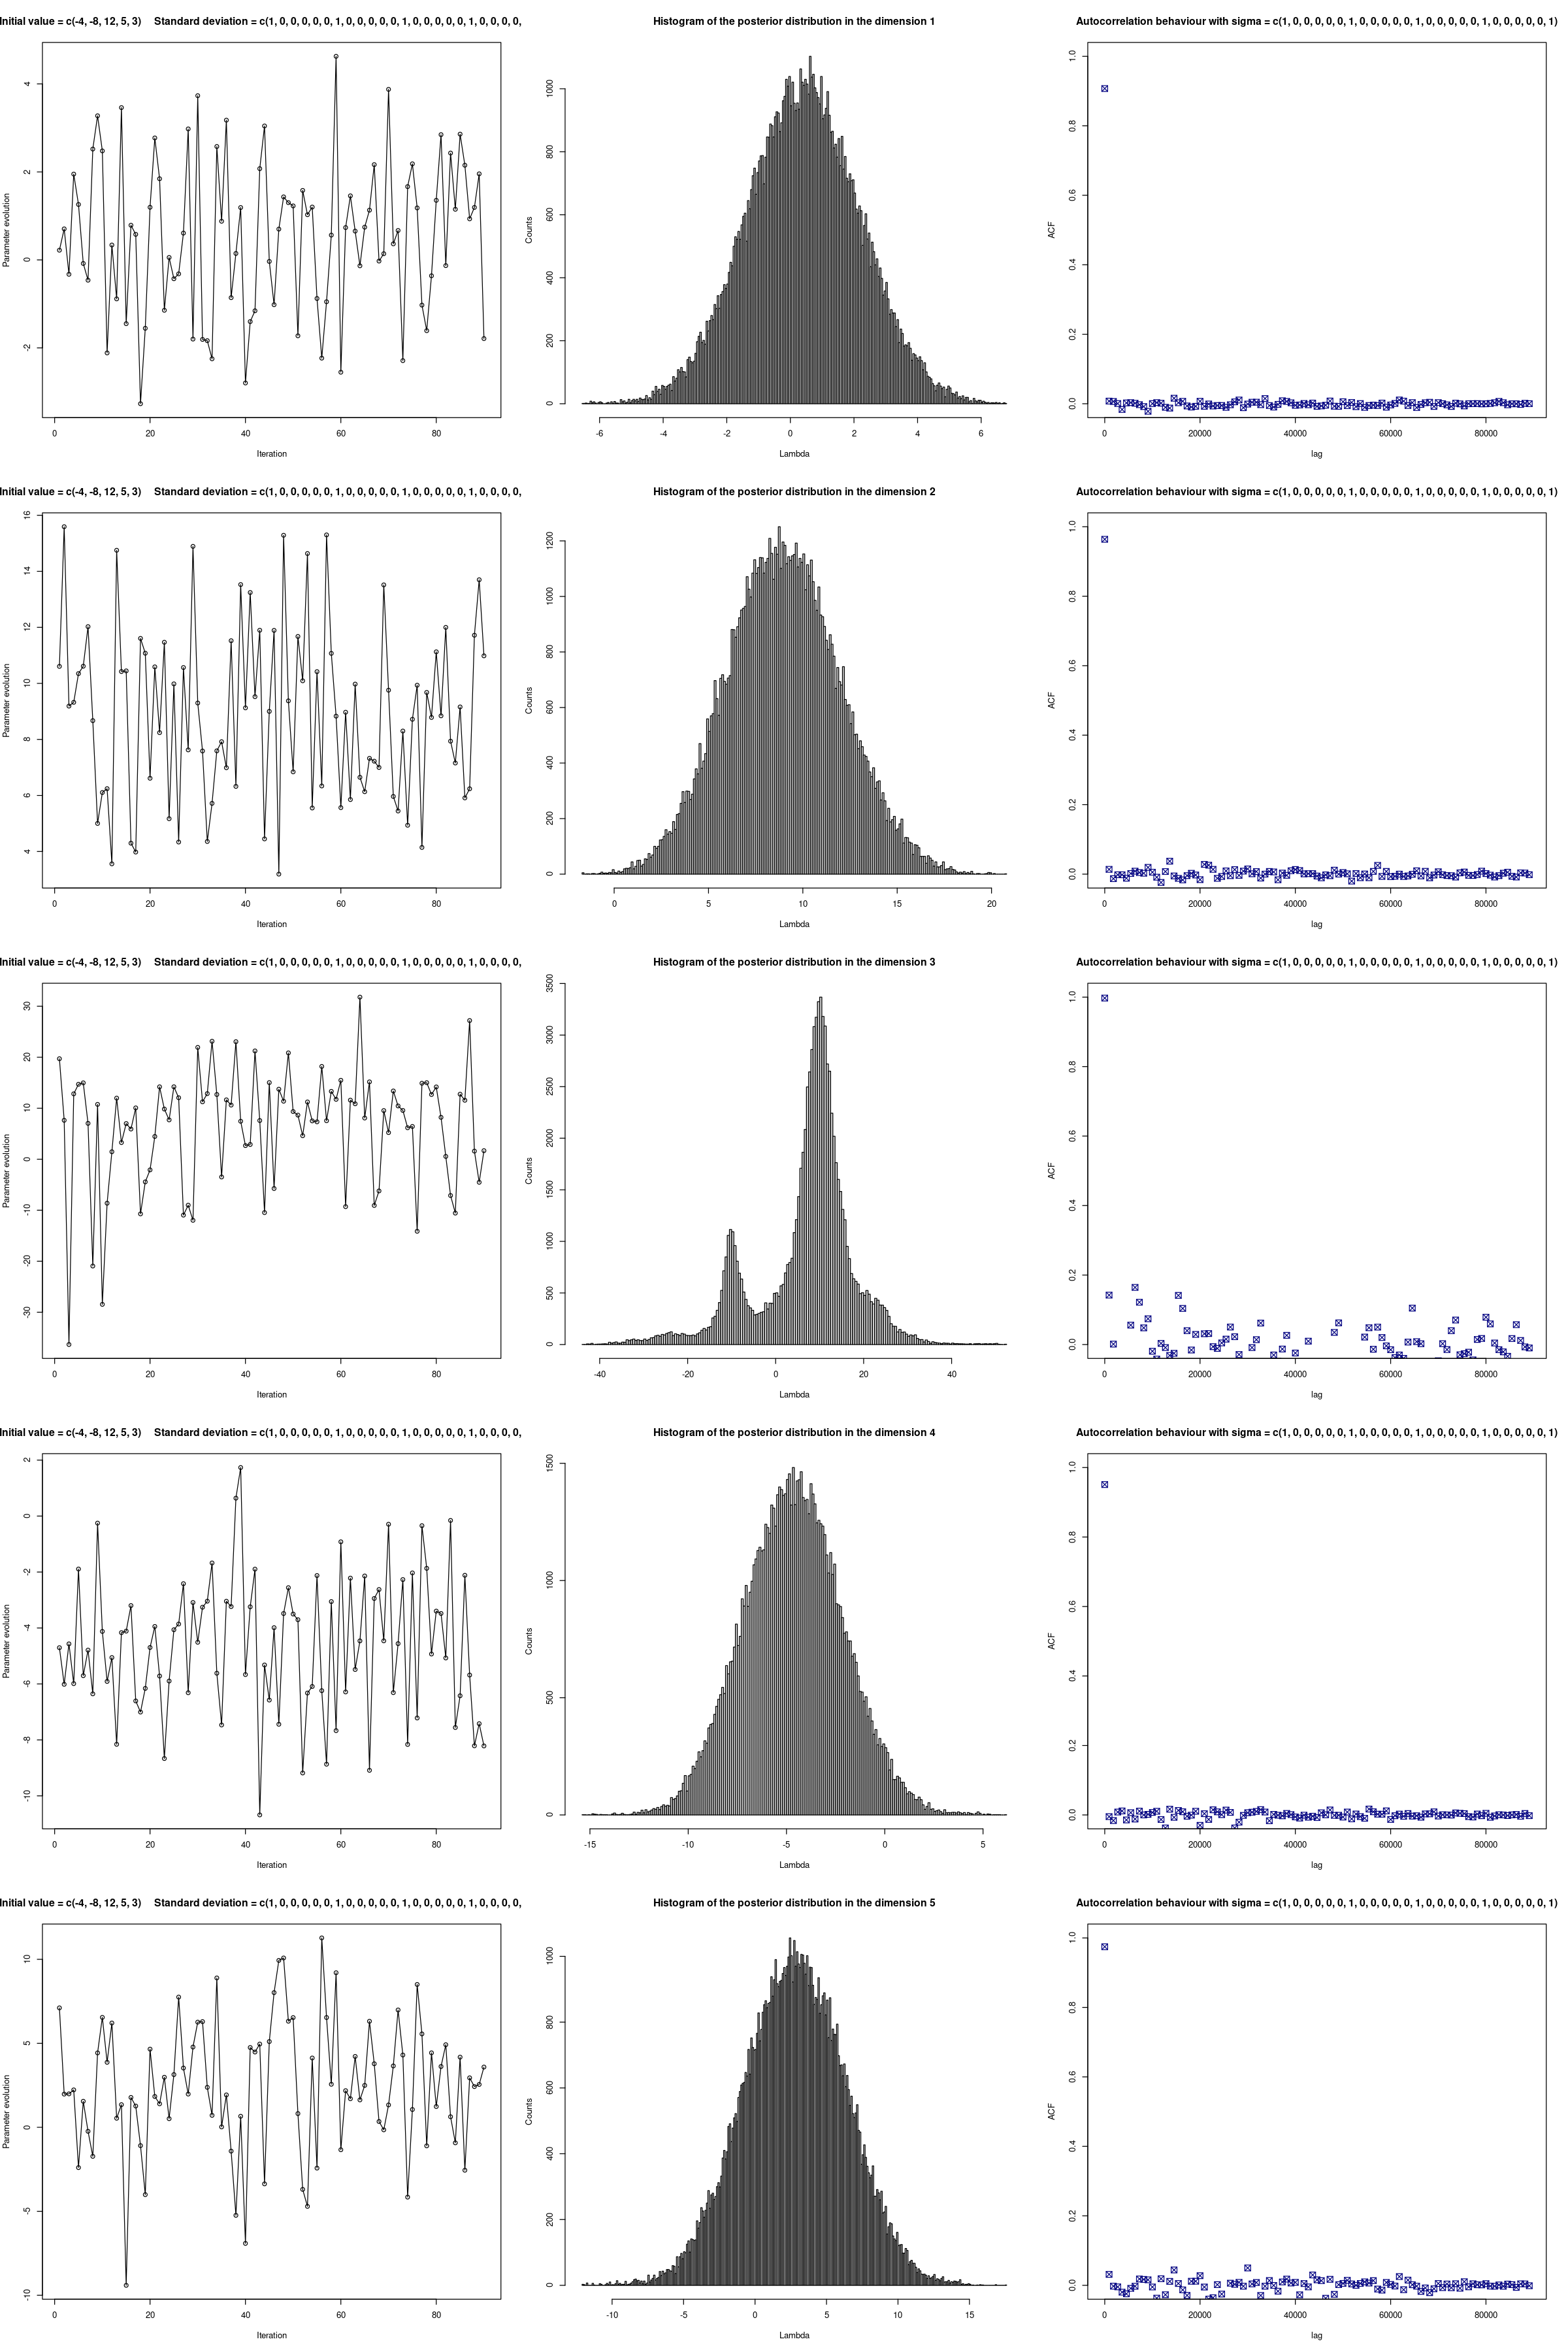

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  83.53527 %


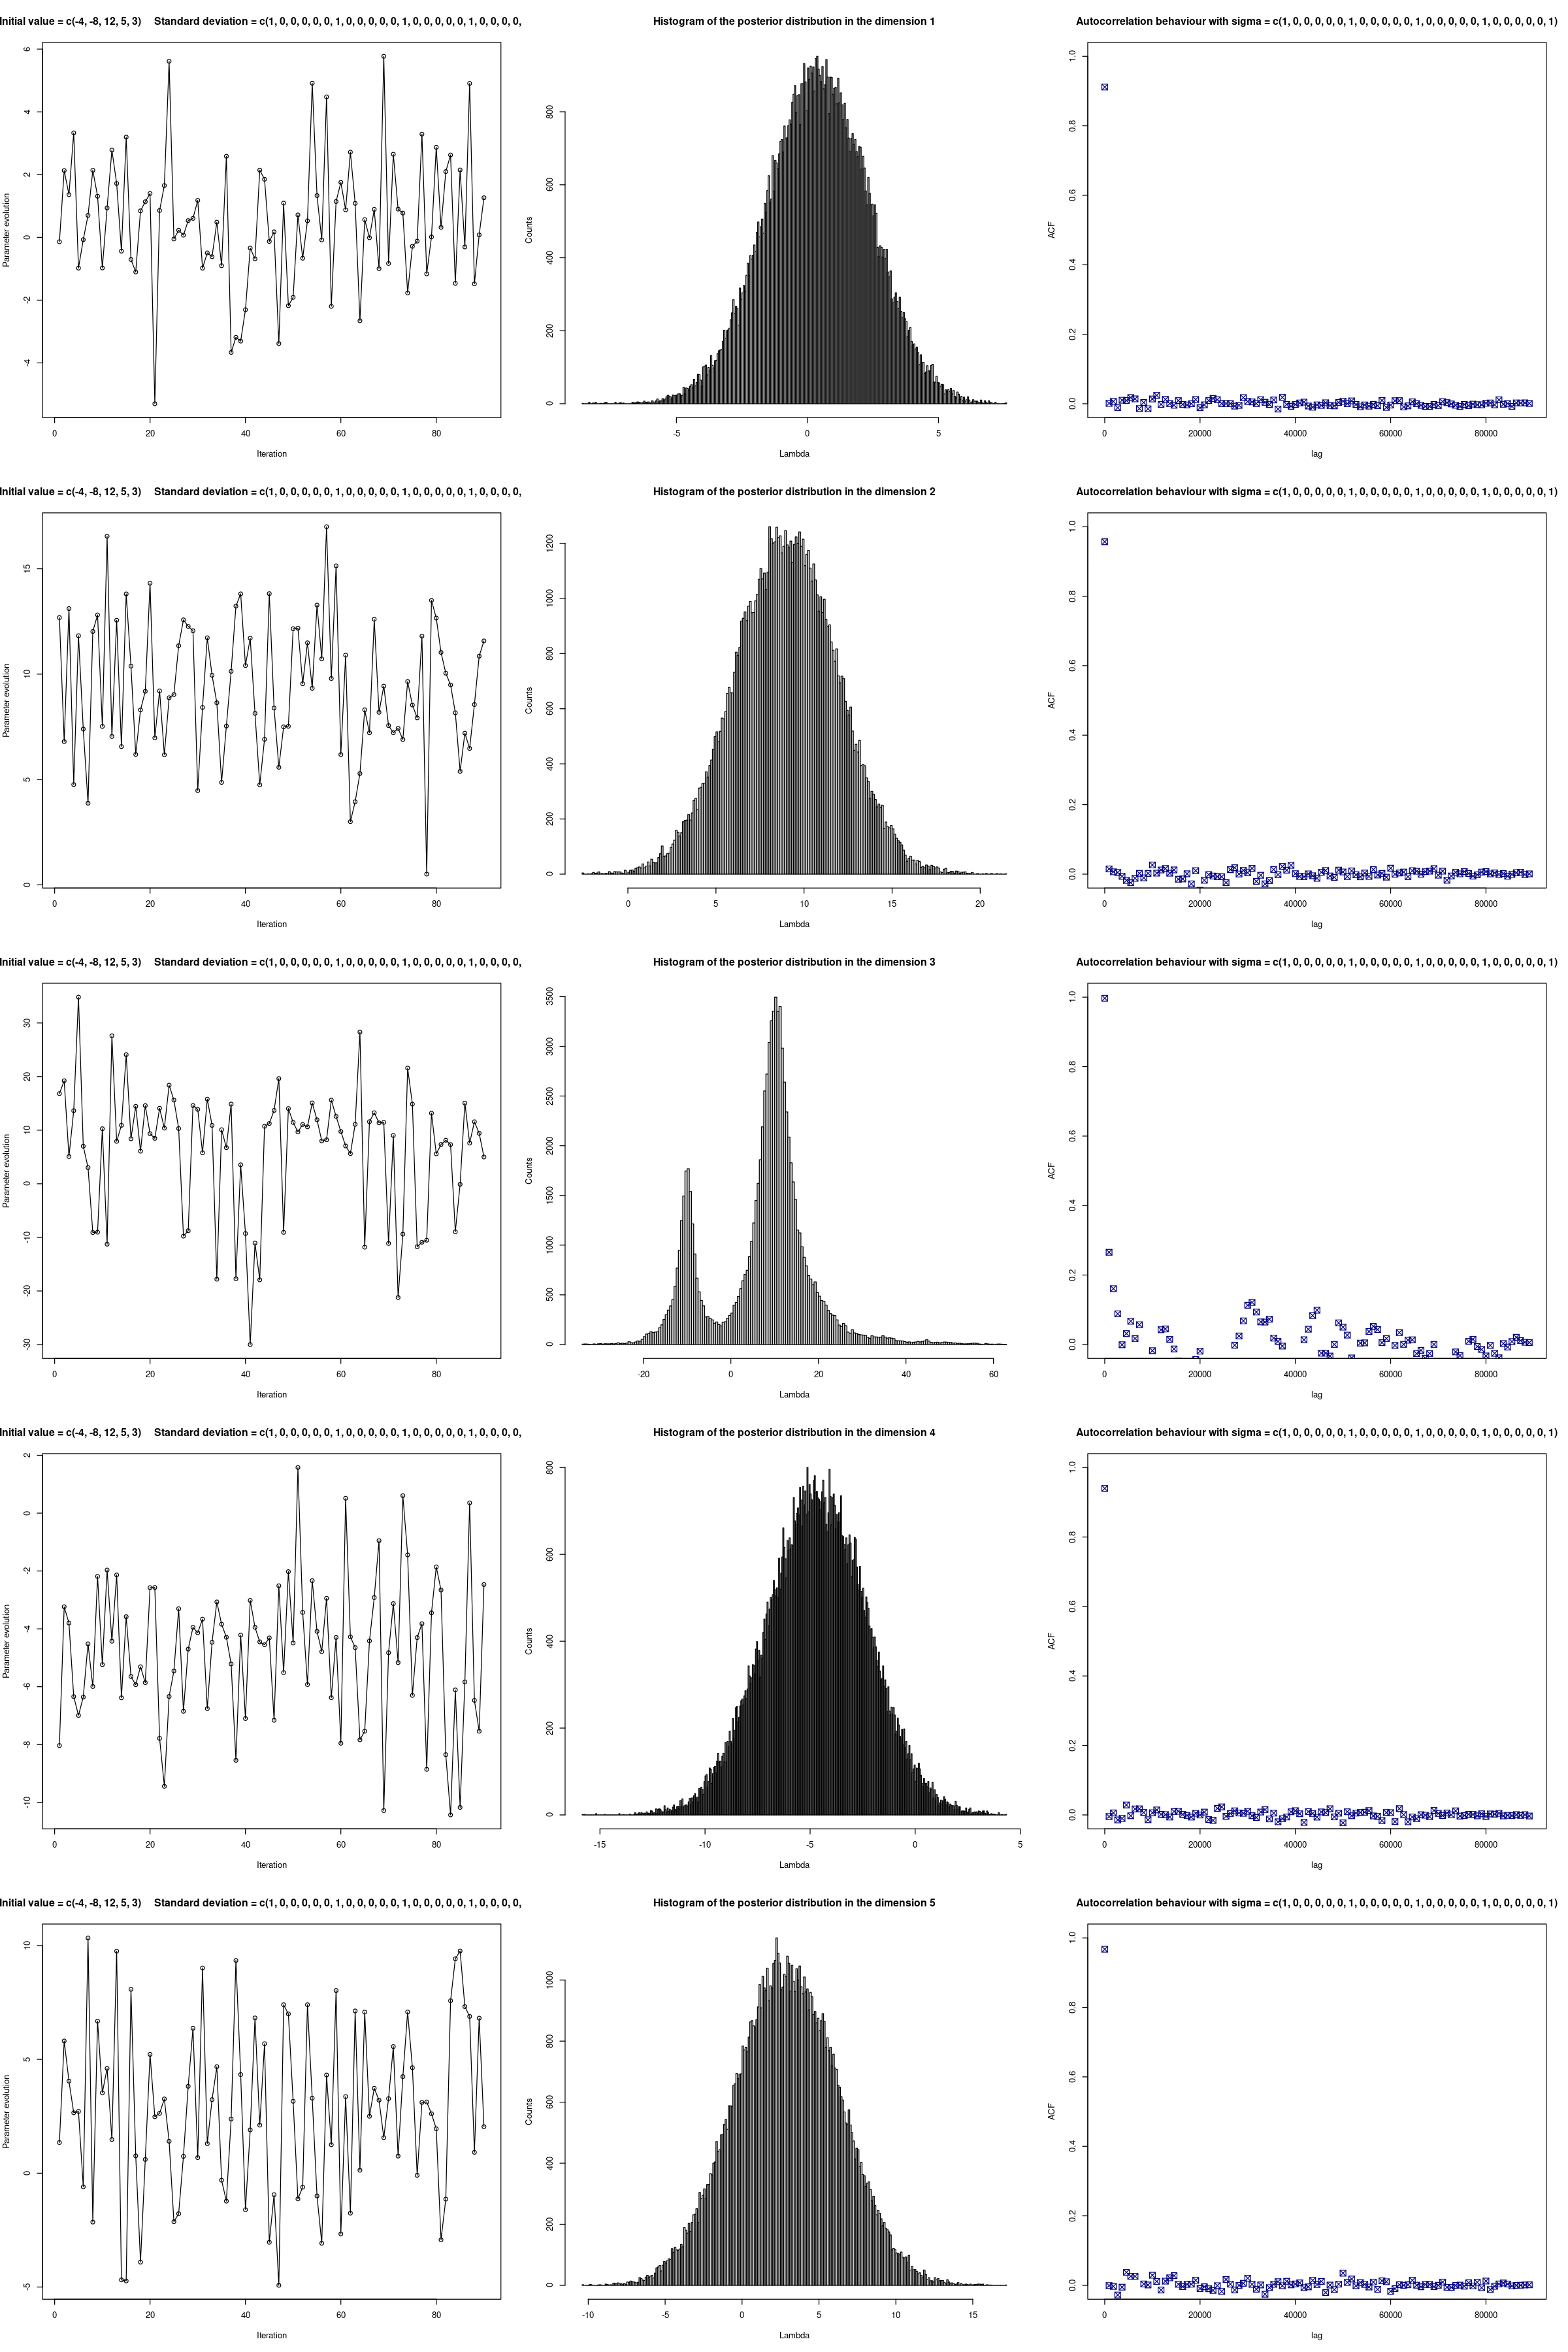

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  11.67182 %
Final mean =  0.4941353 9.114601 0.2525235 -4.57864 2.821803 
Final covariance matrix = 
           [,1]       [,2]         [,3]       [,4]       [,5]
[1,]  3.9752601   8.105799   -0.1313369  -4.148366   2.690186
[2,]  8.1057989 182.201319   -2.4603241 -86.282565  53.534546
[3,] -0.1313369  -2.460324 5911.7762620  -2.953566  -3.220474
[4,] -4.1483656 -86.282565   -2.9535658  50.843745 -26.904130
[5,]  2.6901860  53.534546   -3.2204744 -26.904130  31.596588


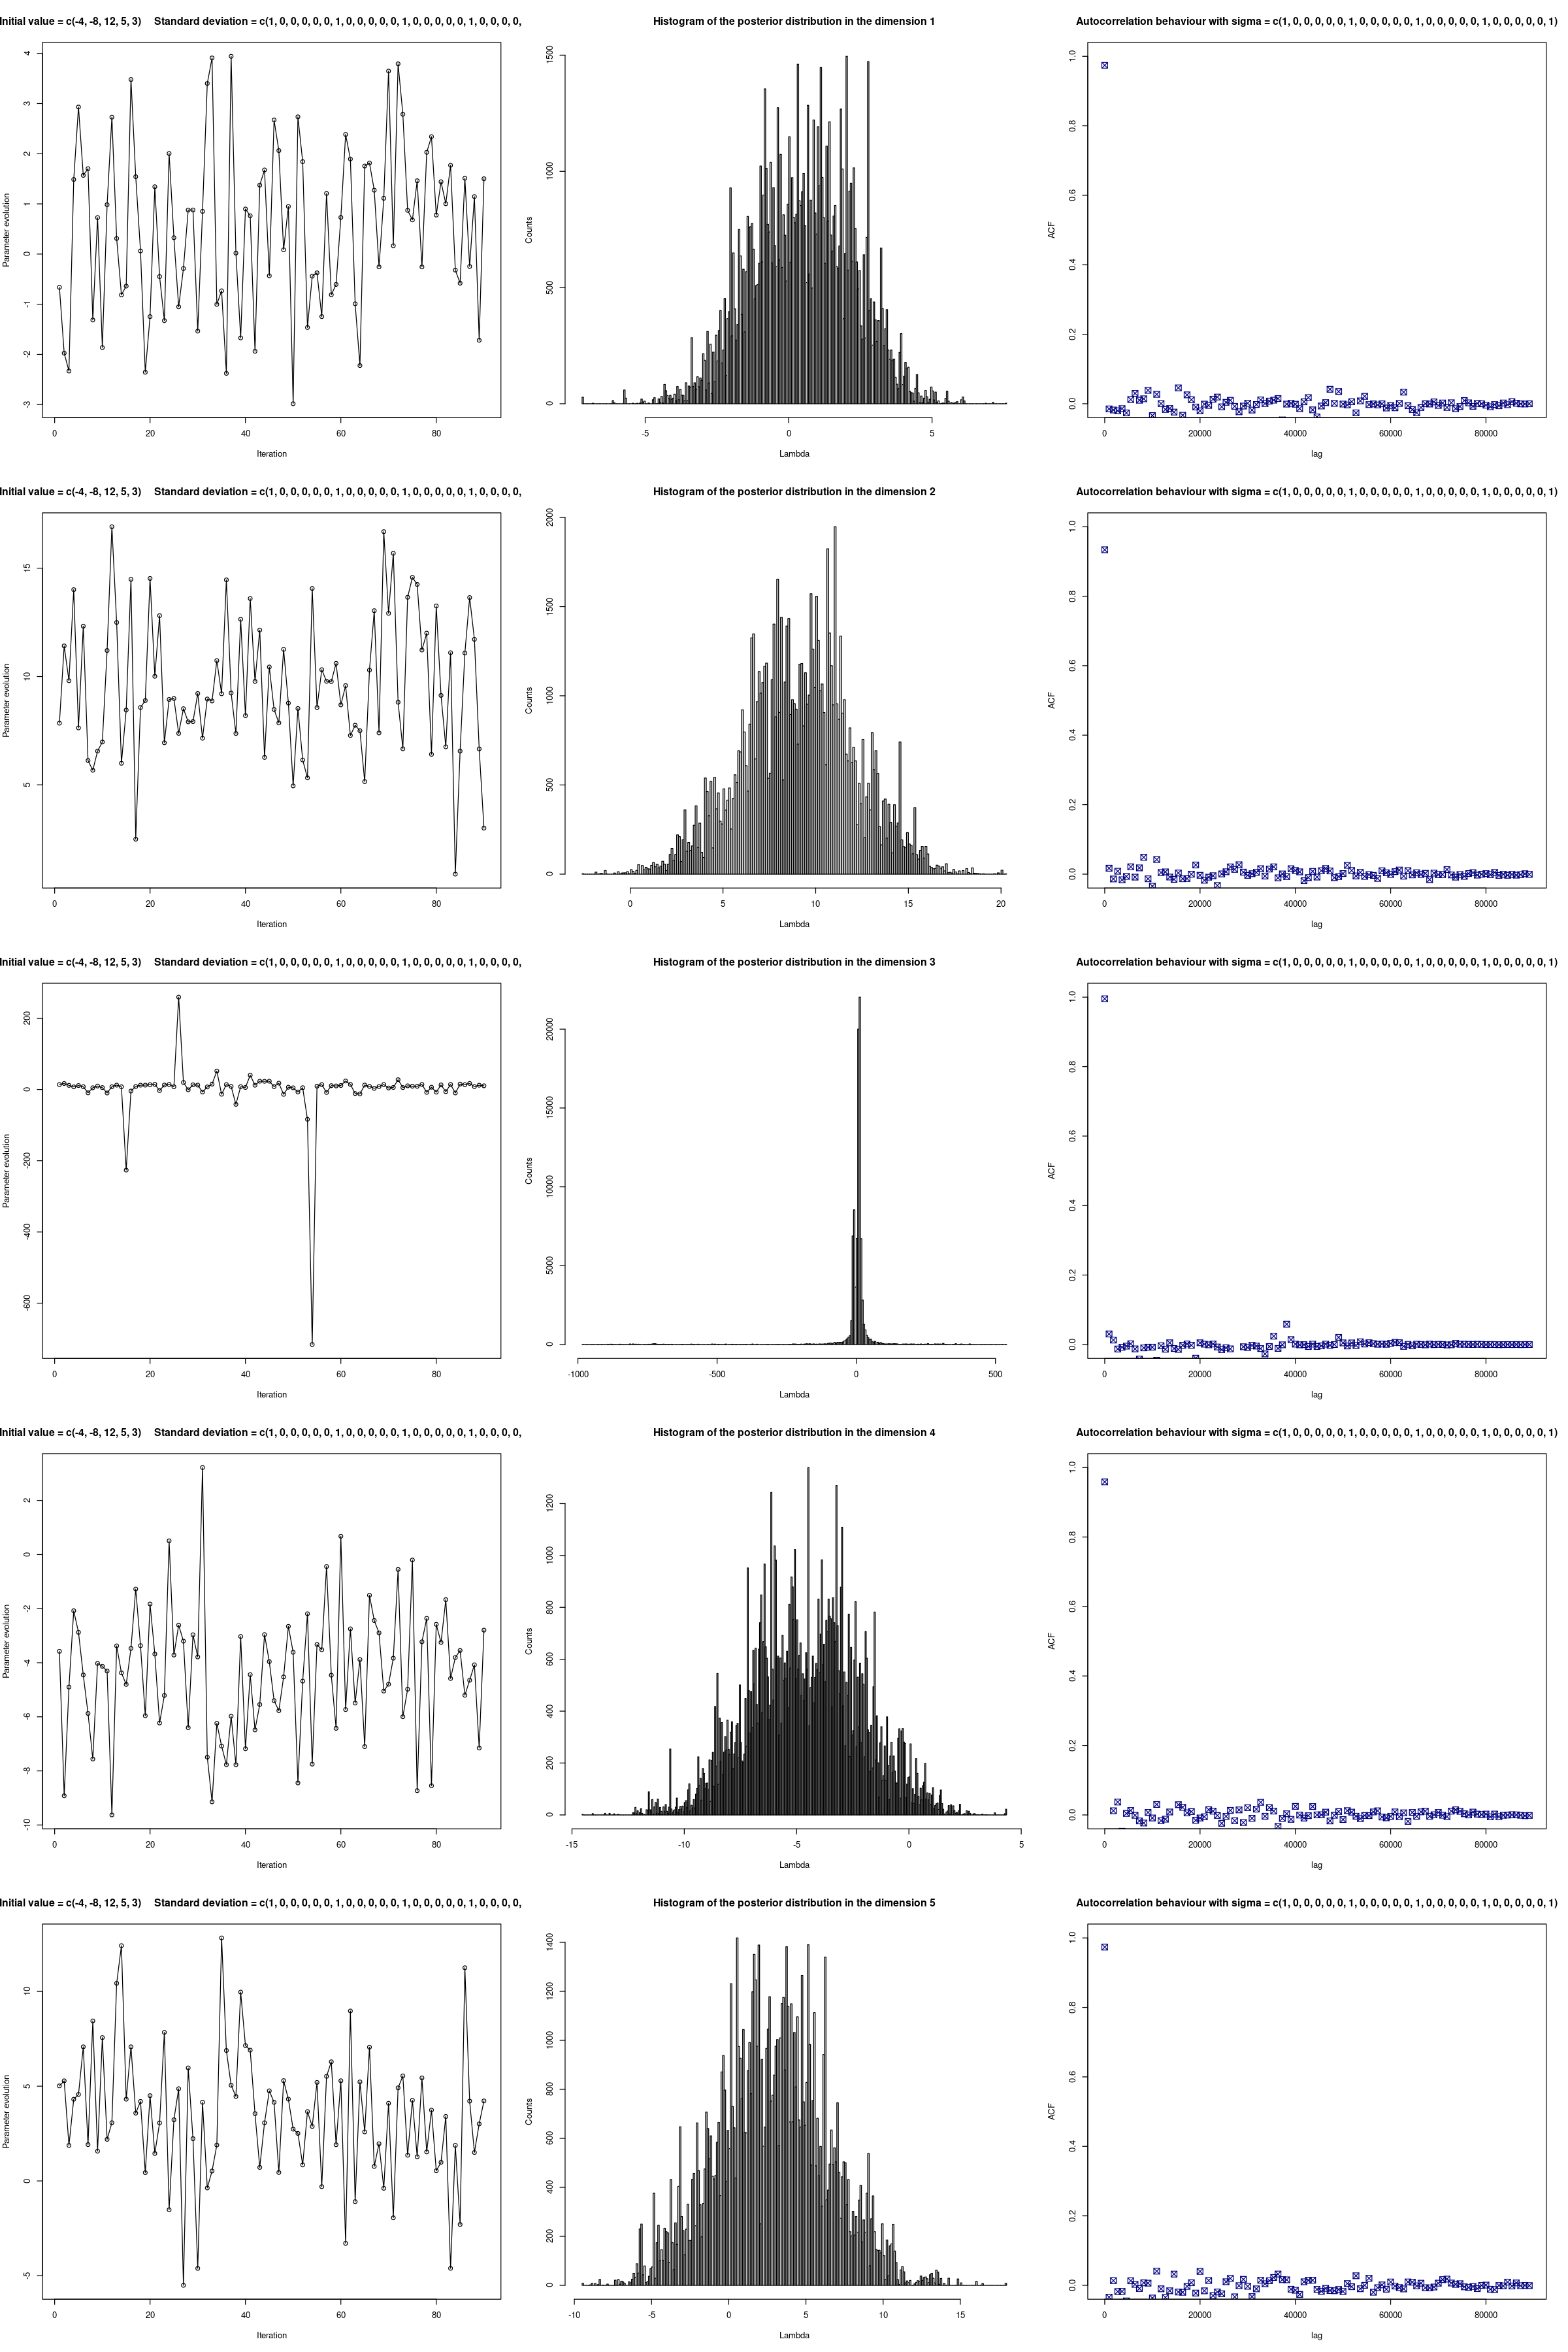

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  29.55327 %
Final mean =  0.3968855 8.977795 6.83212 -4.729446 2.911024 
Final covariance matrix = 
          [,1]       [,2]       [,3]       [,4]       [,5]
[1,]  4.388943   7.065042   4.768835  -3.784446   2.282168
[2,]  7.065042 174.218950 117.829913 -87.900176  53.519043
[3,]  4.768835 117.829913 493.685204 -63.112531  37.089628
[4,] -3.784446 -87.900176 -63.112531  52.180807 -28.619972
[5,]  2.282168  53.519043  37.089628 -28.619972  28.778856


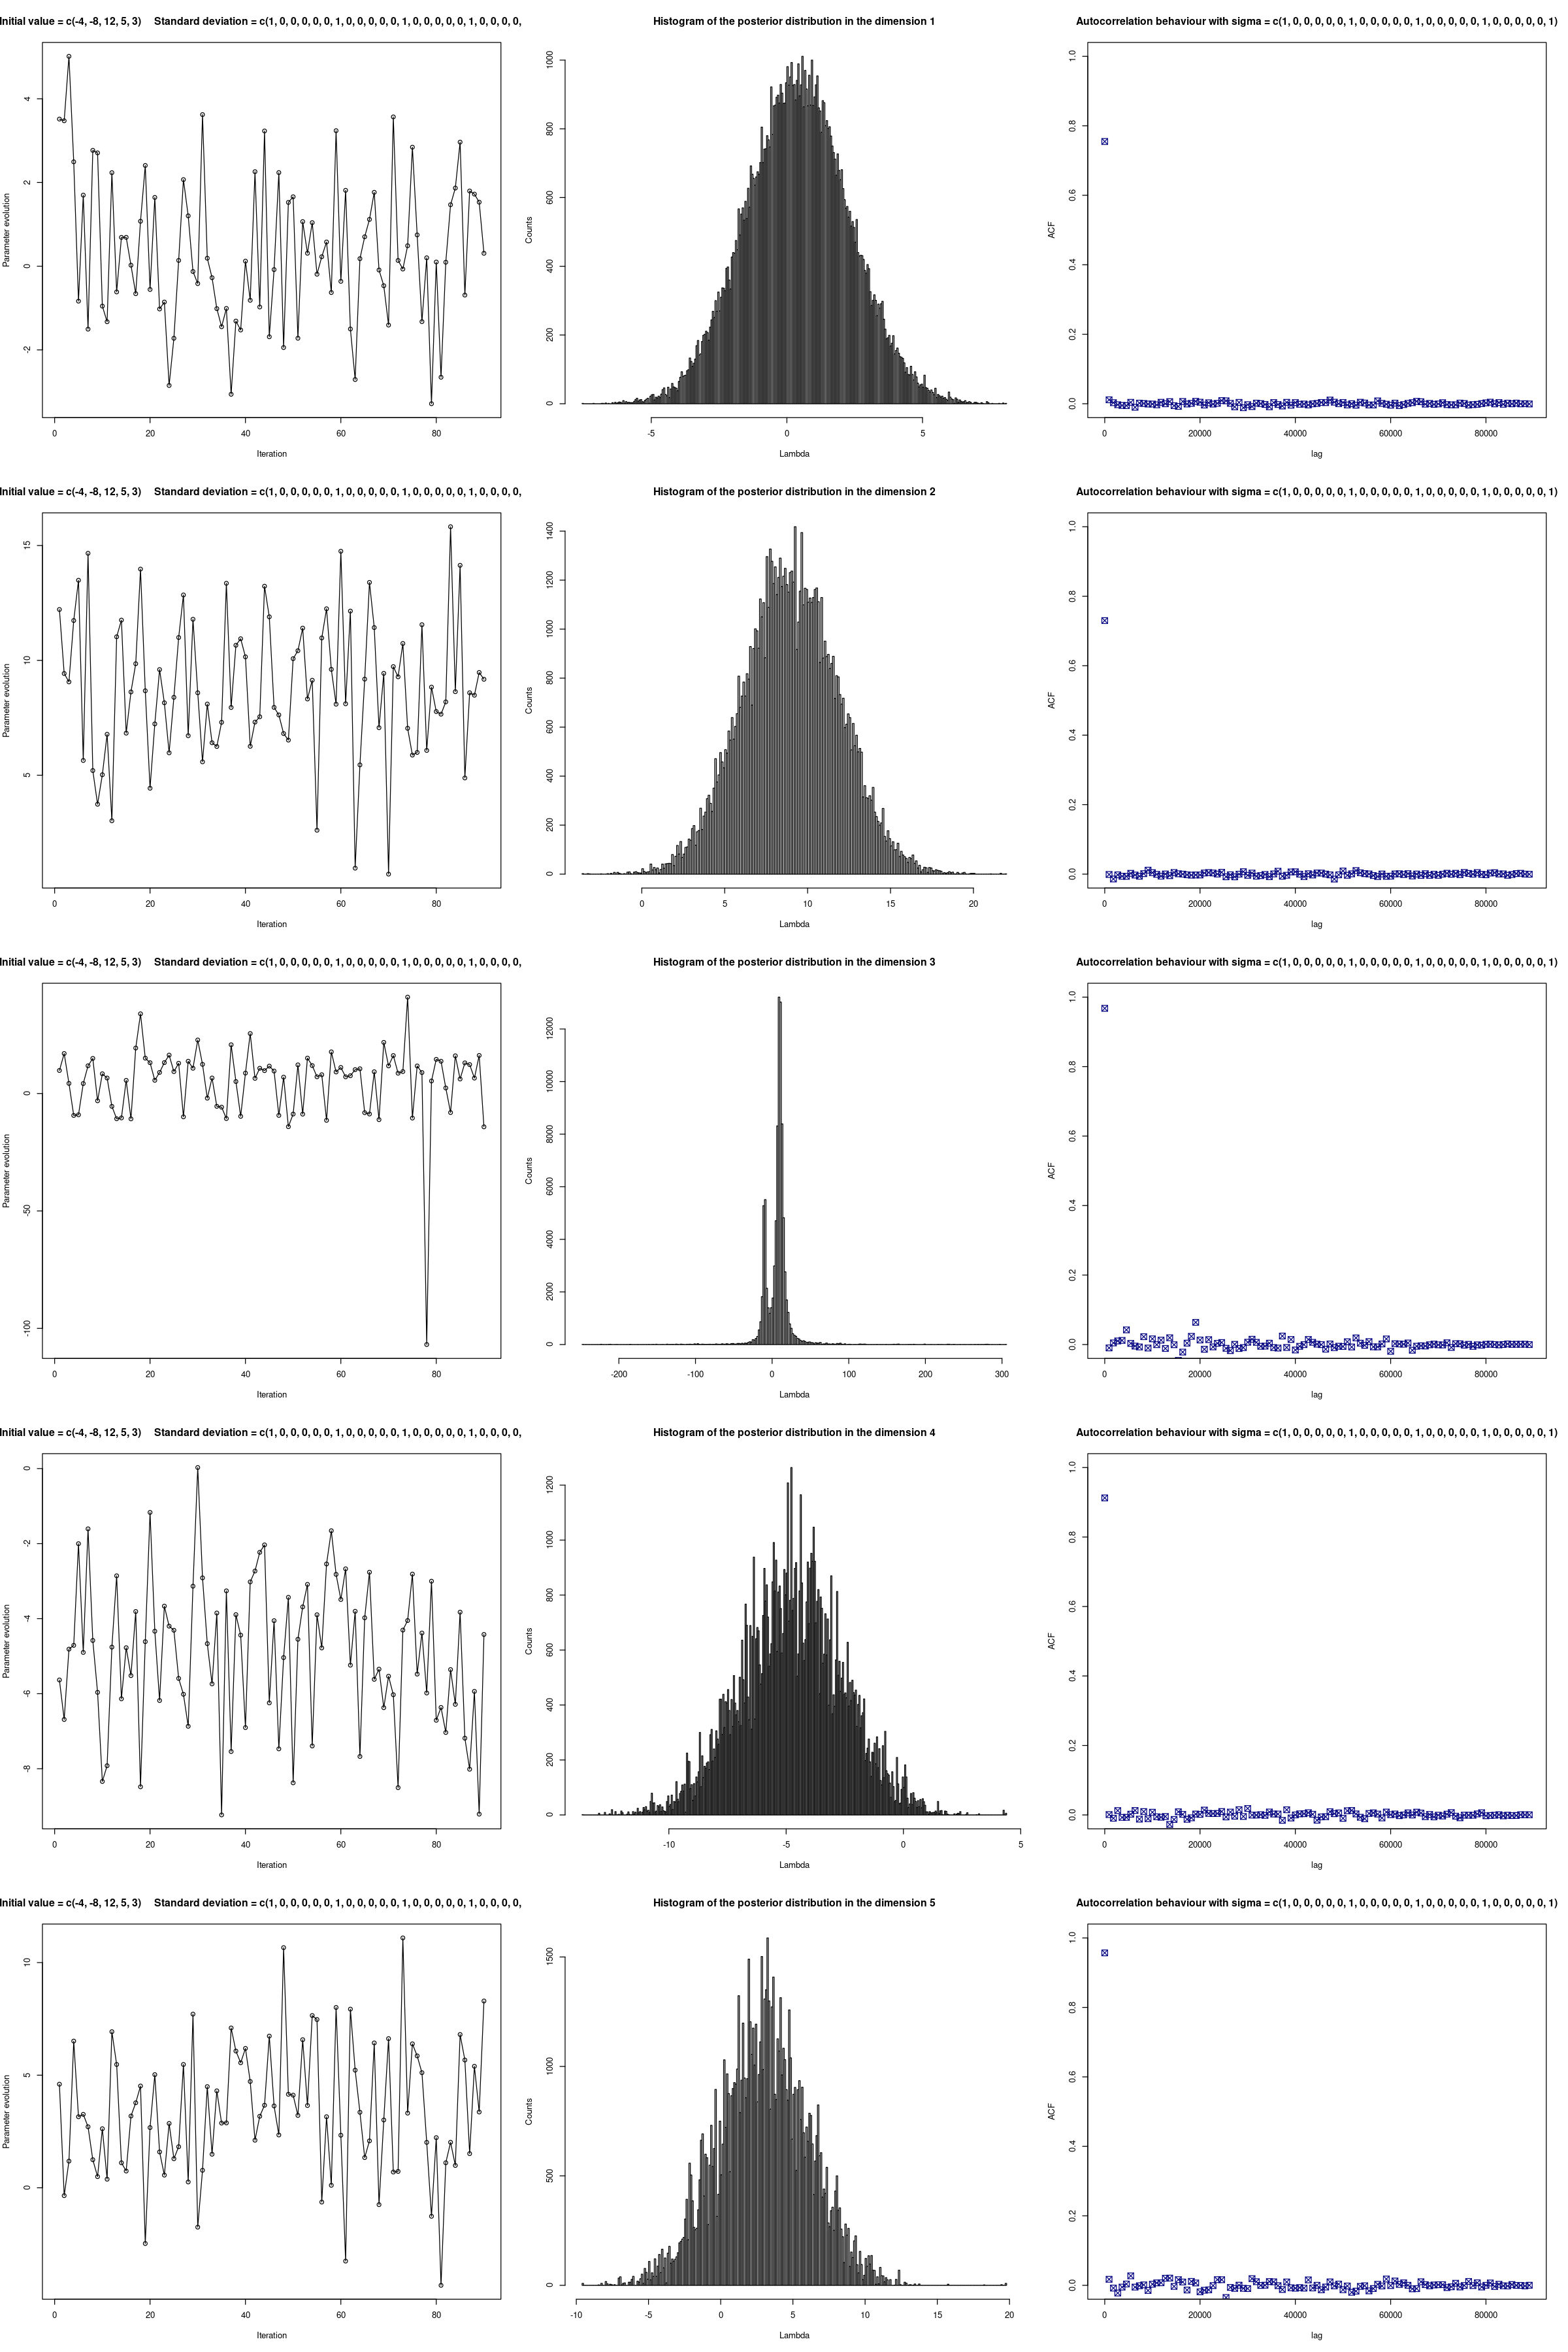

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  37.05818 %
Final mean =  0.3881635 9.049307 5.552077 -4.720318 2.876696 
Final covariance matrix = 
            [,1]        [,2]         [,3]        [,4]        [,5]
[1,]  3.13885945  0.01398949  -0.03062418  0.17615964 -0.08994516
[2,]  0.01398949  9.23246873  -1.56135642 -0.04491363 -0.30557596
[3,] -0.03062418 -1.56135642 264.05031502 -1.63080428 -1.28145807
[4,]  0.17615964 -0.04491363  -1.63080428  5.91359322  0.21047179
[5,] -0.08994516 -0.30557596  -1.28145807  0.21047179 11.86526200


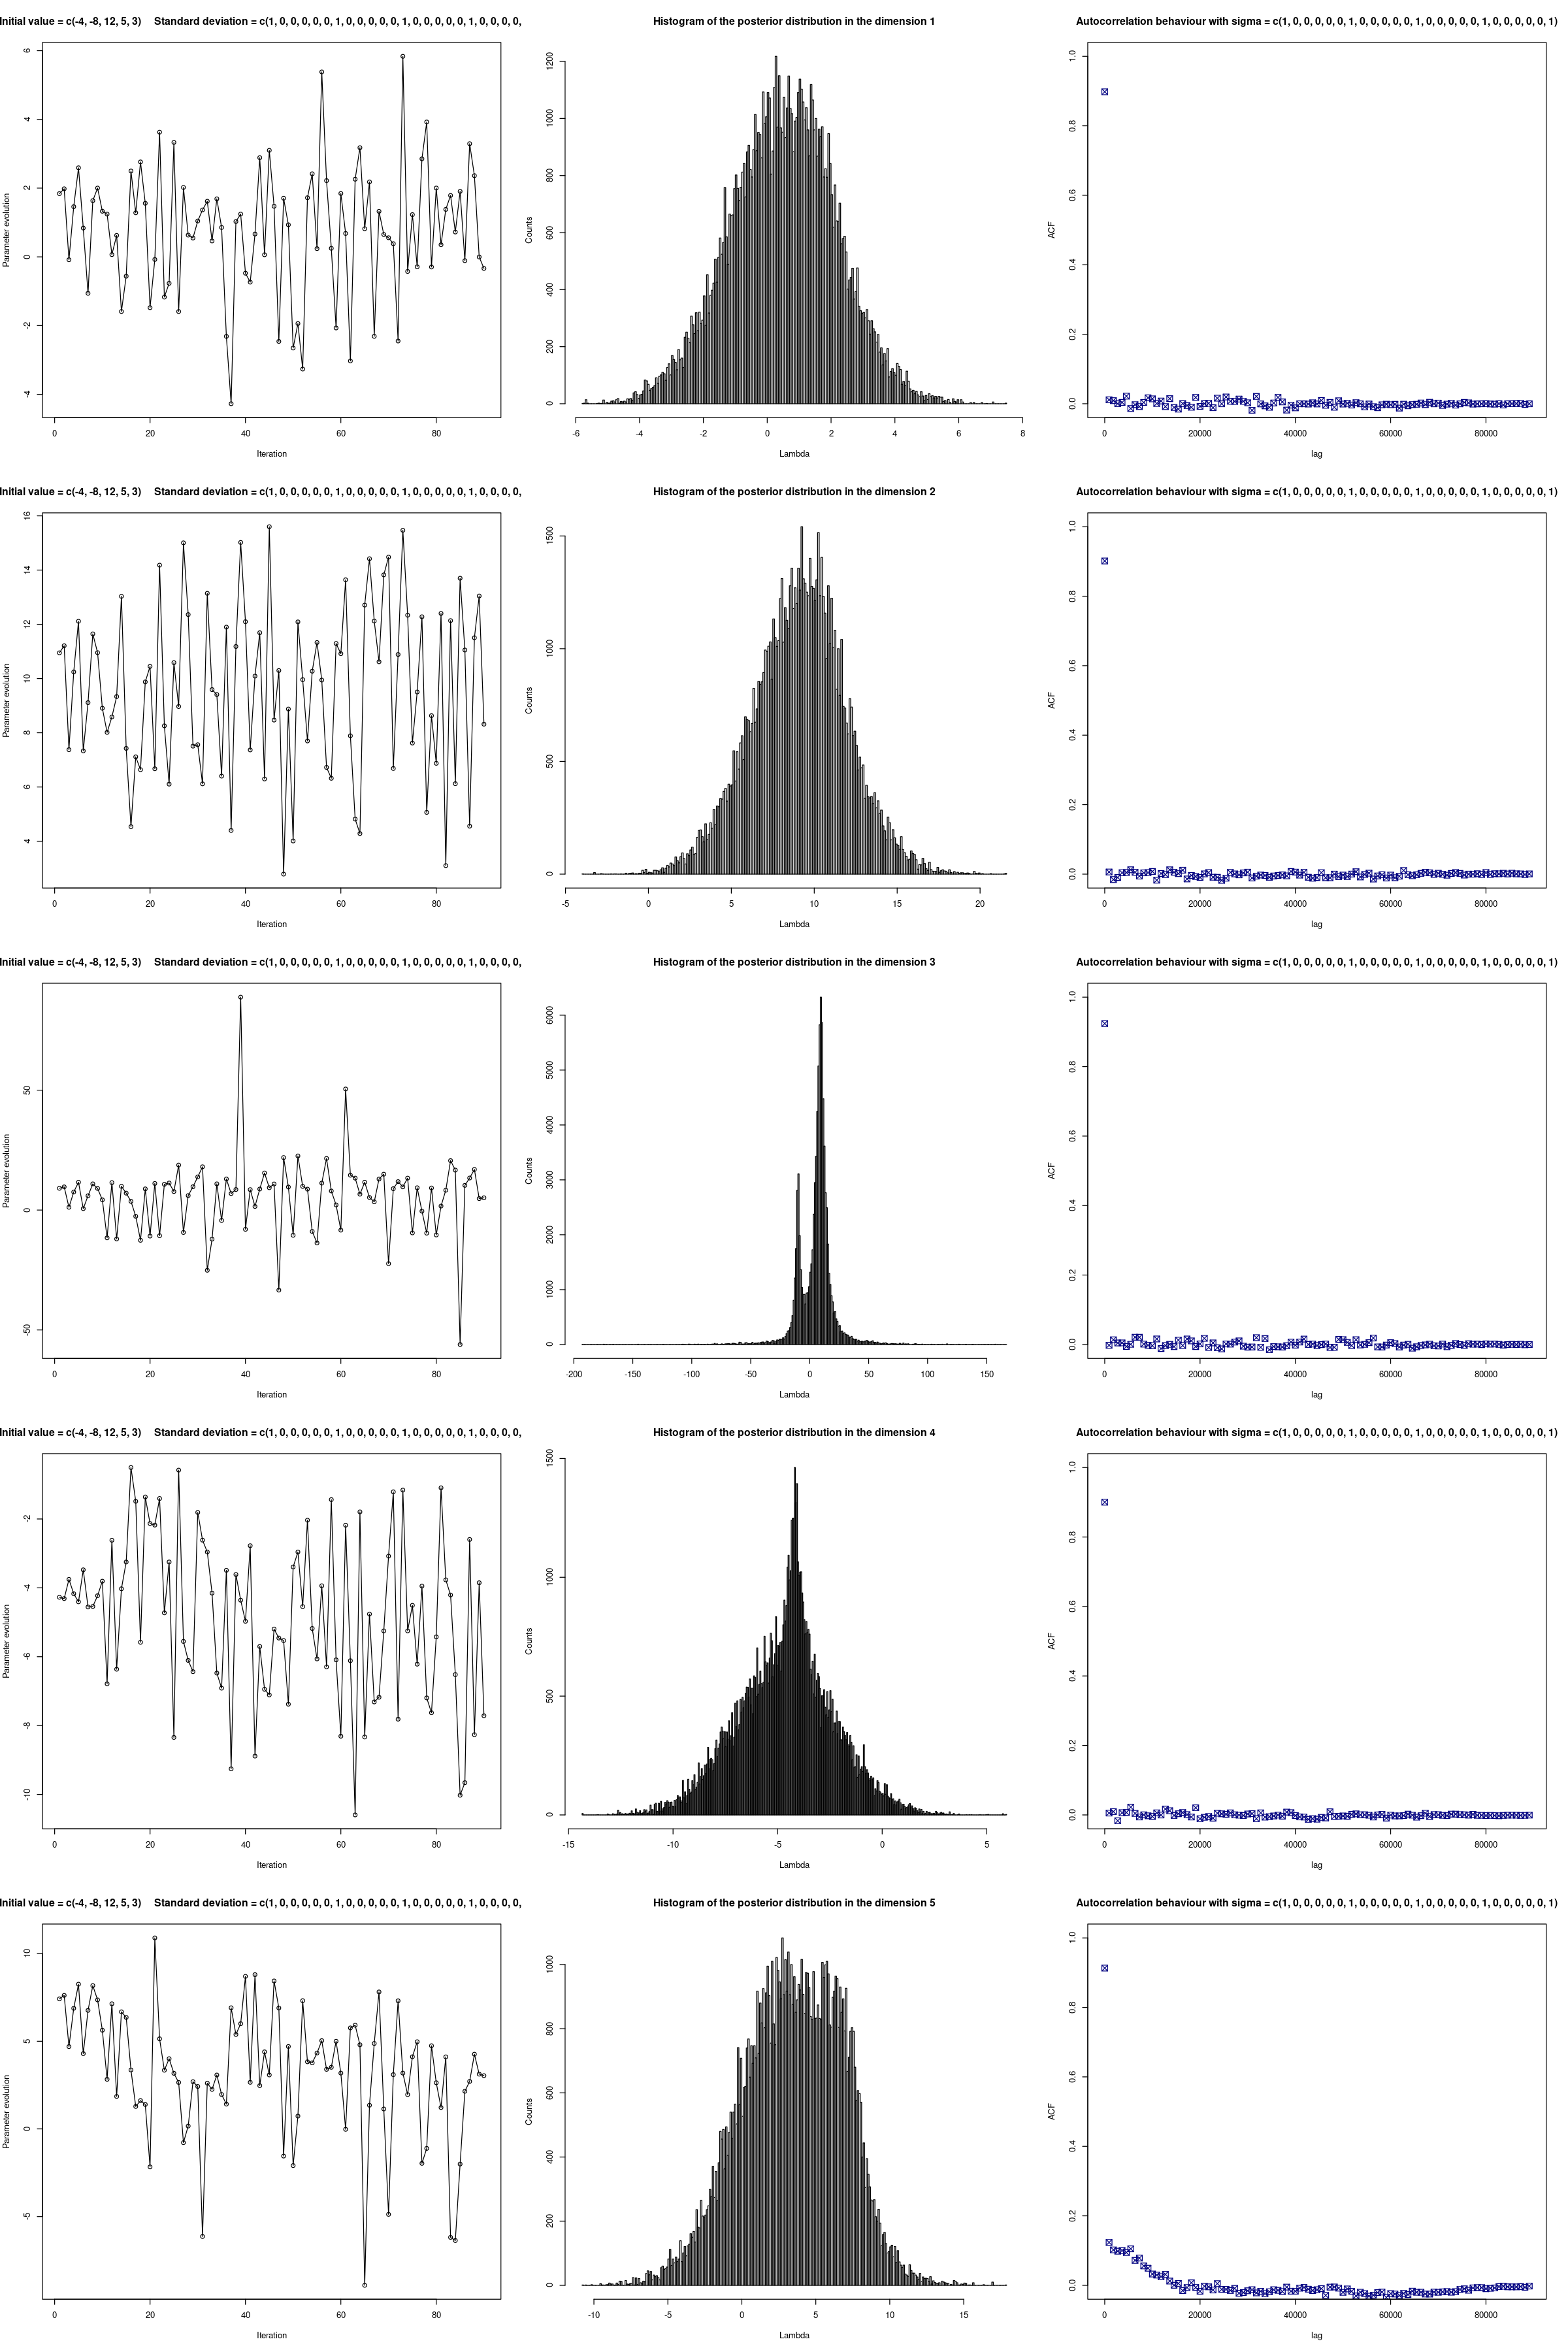

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  52.07964 %
Final mean =  0.3692655 8.986745 6.642356 -4.719272 2.887583 
Final covariance matrix = 
            [,1]        [,2]        [,3]        [,4]        [,5]
[1,]  4.48410907 -0.09445290  -0.1207584  0.12496327  0.06819158
[2,] -0.09445290  8.45992286  -0.7134118 -0.06417855  0.01798414
[3,] -0.12075844 -0.71341182 594.9043470 -0.12981757 -1.95463800
[4,]  0.12496327 -0.06417855  -0.1298176  5.10289369  0.06874718
[5,]  0.06819158  0.01798414  -1.9546380  0.06874718 10.29210201


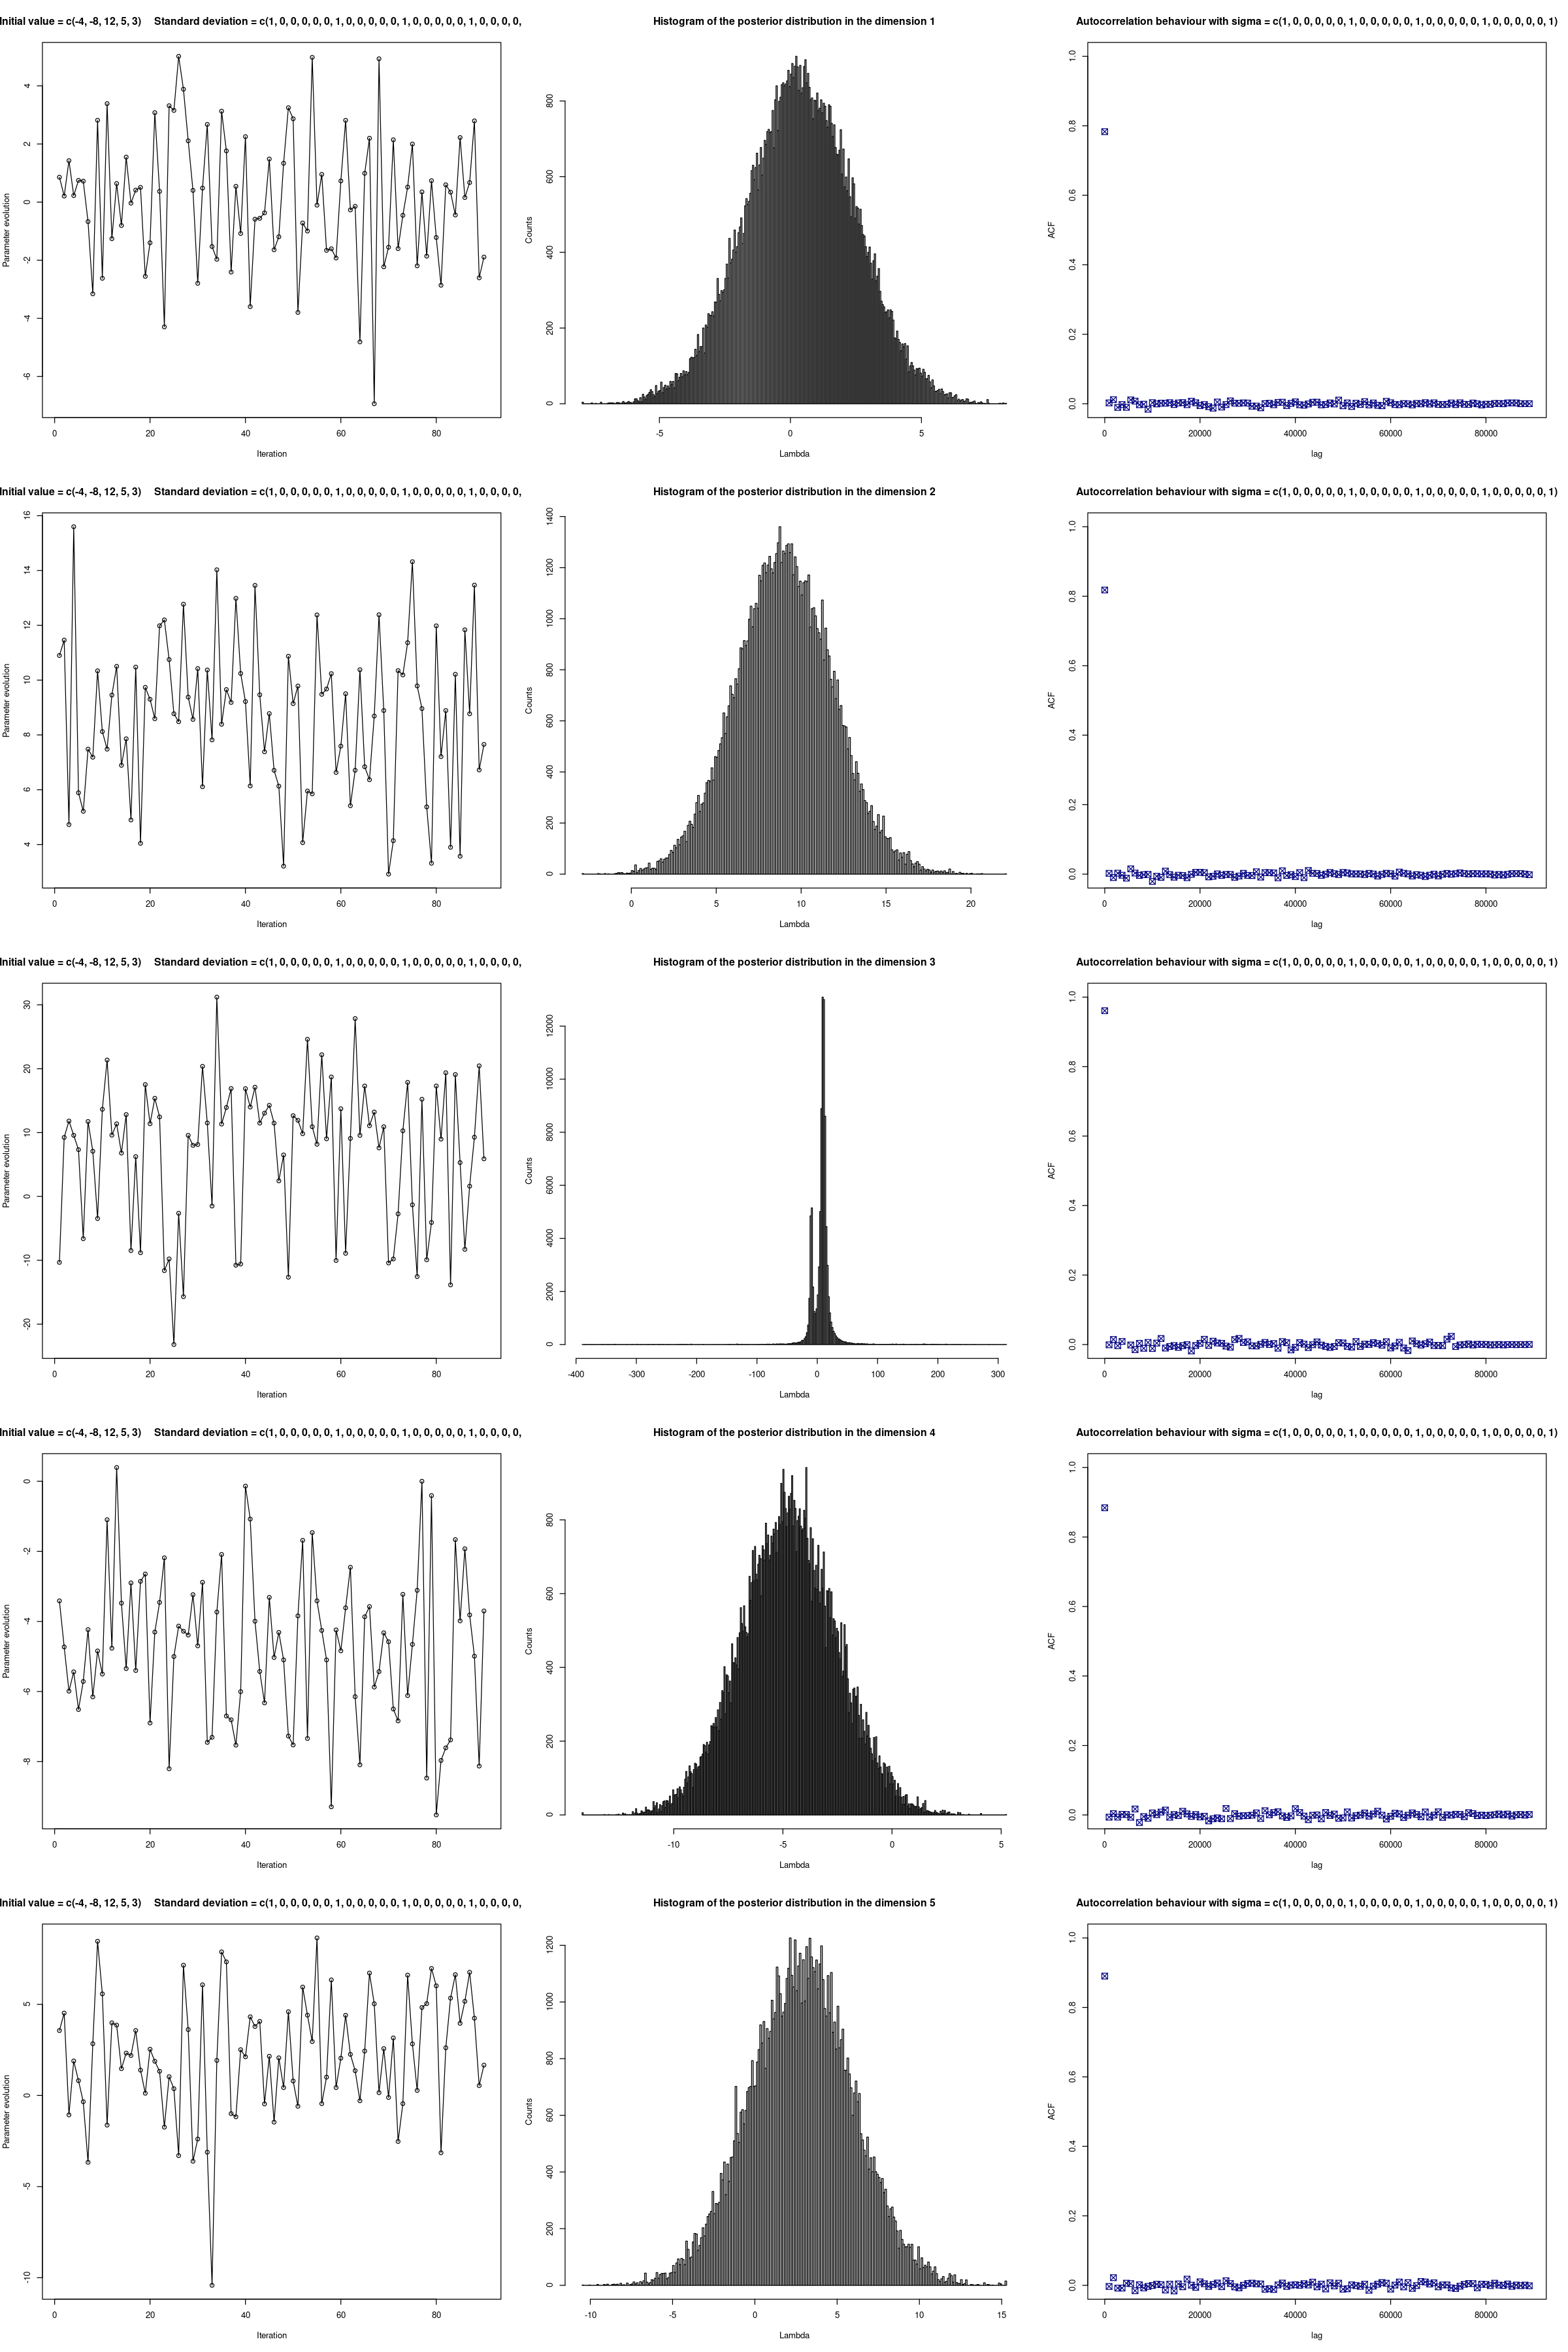

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  95.73545 %
Final mean =  0.8623089 11.70142 10.37027 -4.521033 2.375461 
Final lambda =  -91.92986 
Final covariance matrix = 
               [,1]           [,2]           [,3]           [,4]           [,5]
[1,]  4.940656e-324 -4.940656e-324  4.940656e-324 -4.940656e-324 -4.940656e-324
[2,] -4.940656e-324  4.940656e-324 -4.940656e-324  4.940656e-324  4.940656e-324
[3,]  4.940656e-324 -4.940656e-324  4.940656e-324 -4.940656e-324 -4.940656e-324
[4,] -4.940656e-324  4.940656e-324 -4.940656e-324  4.940656e-324  4.940656e-324
[5,] -4.940656e-324  4.940656e-324 -4.940656e-324  4.940656e-324  4.940656e-324


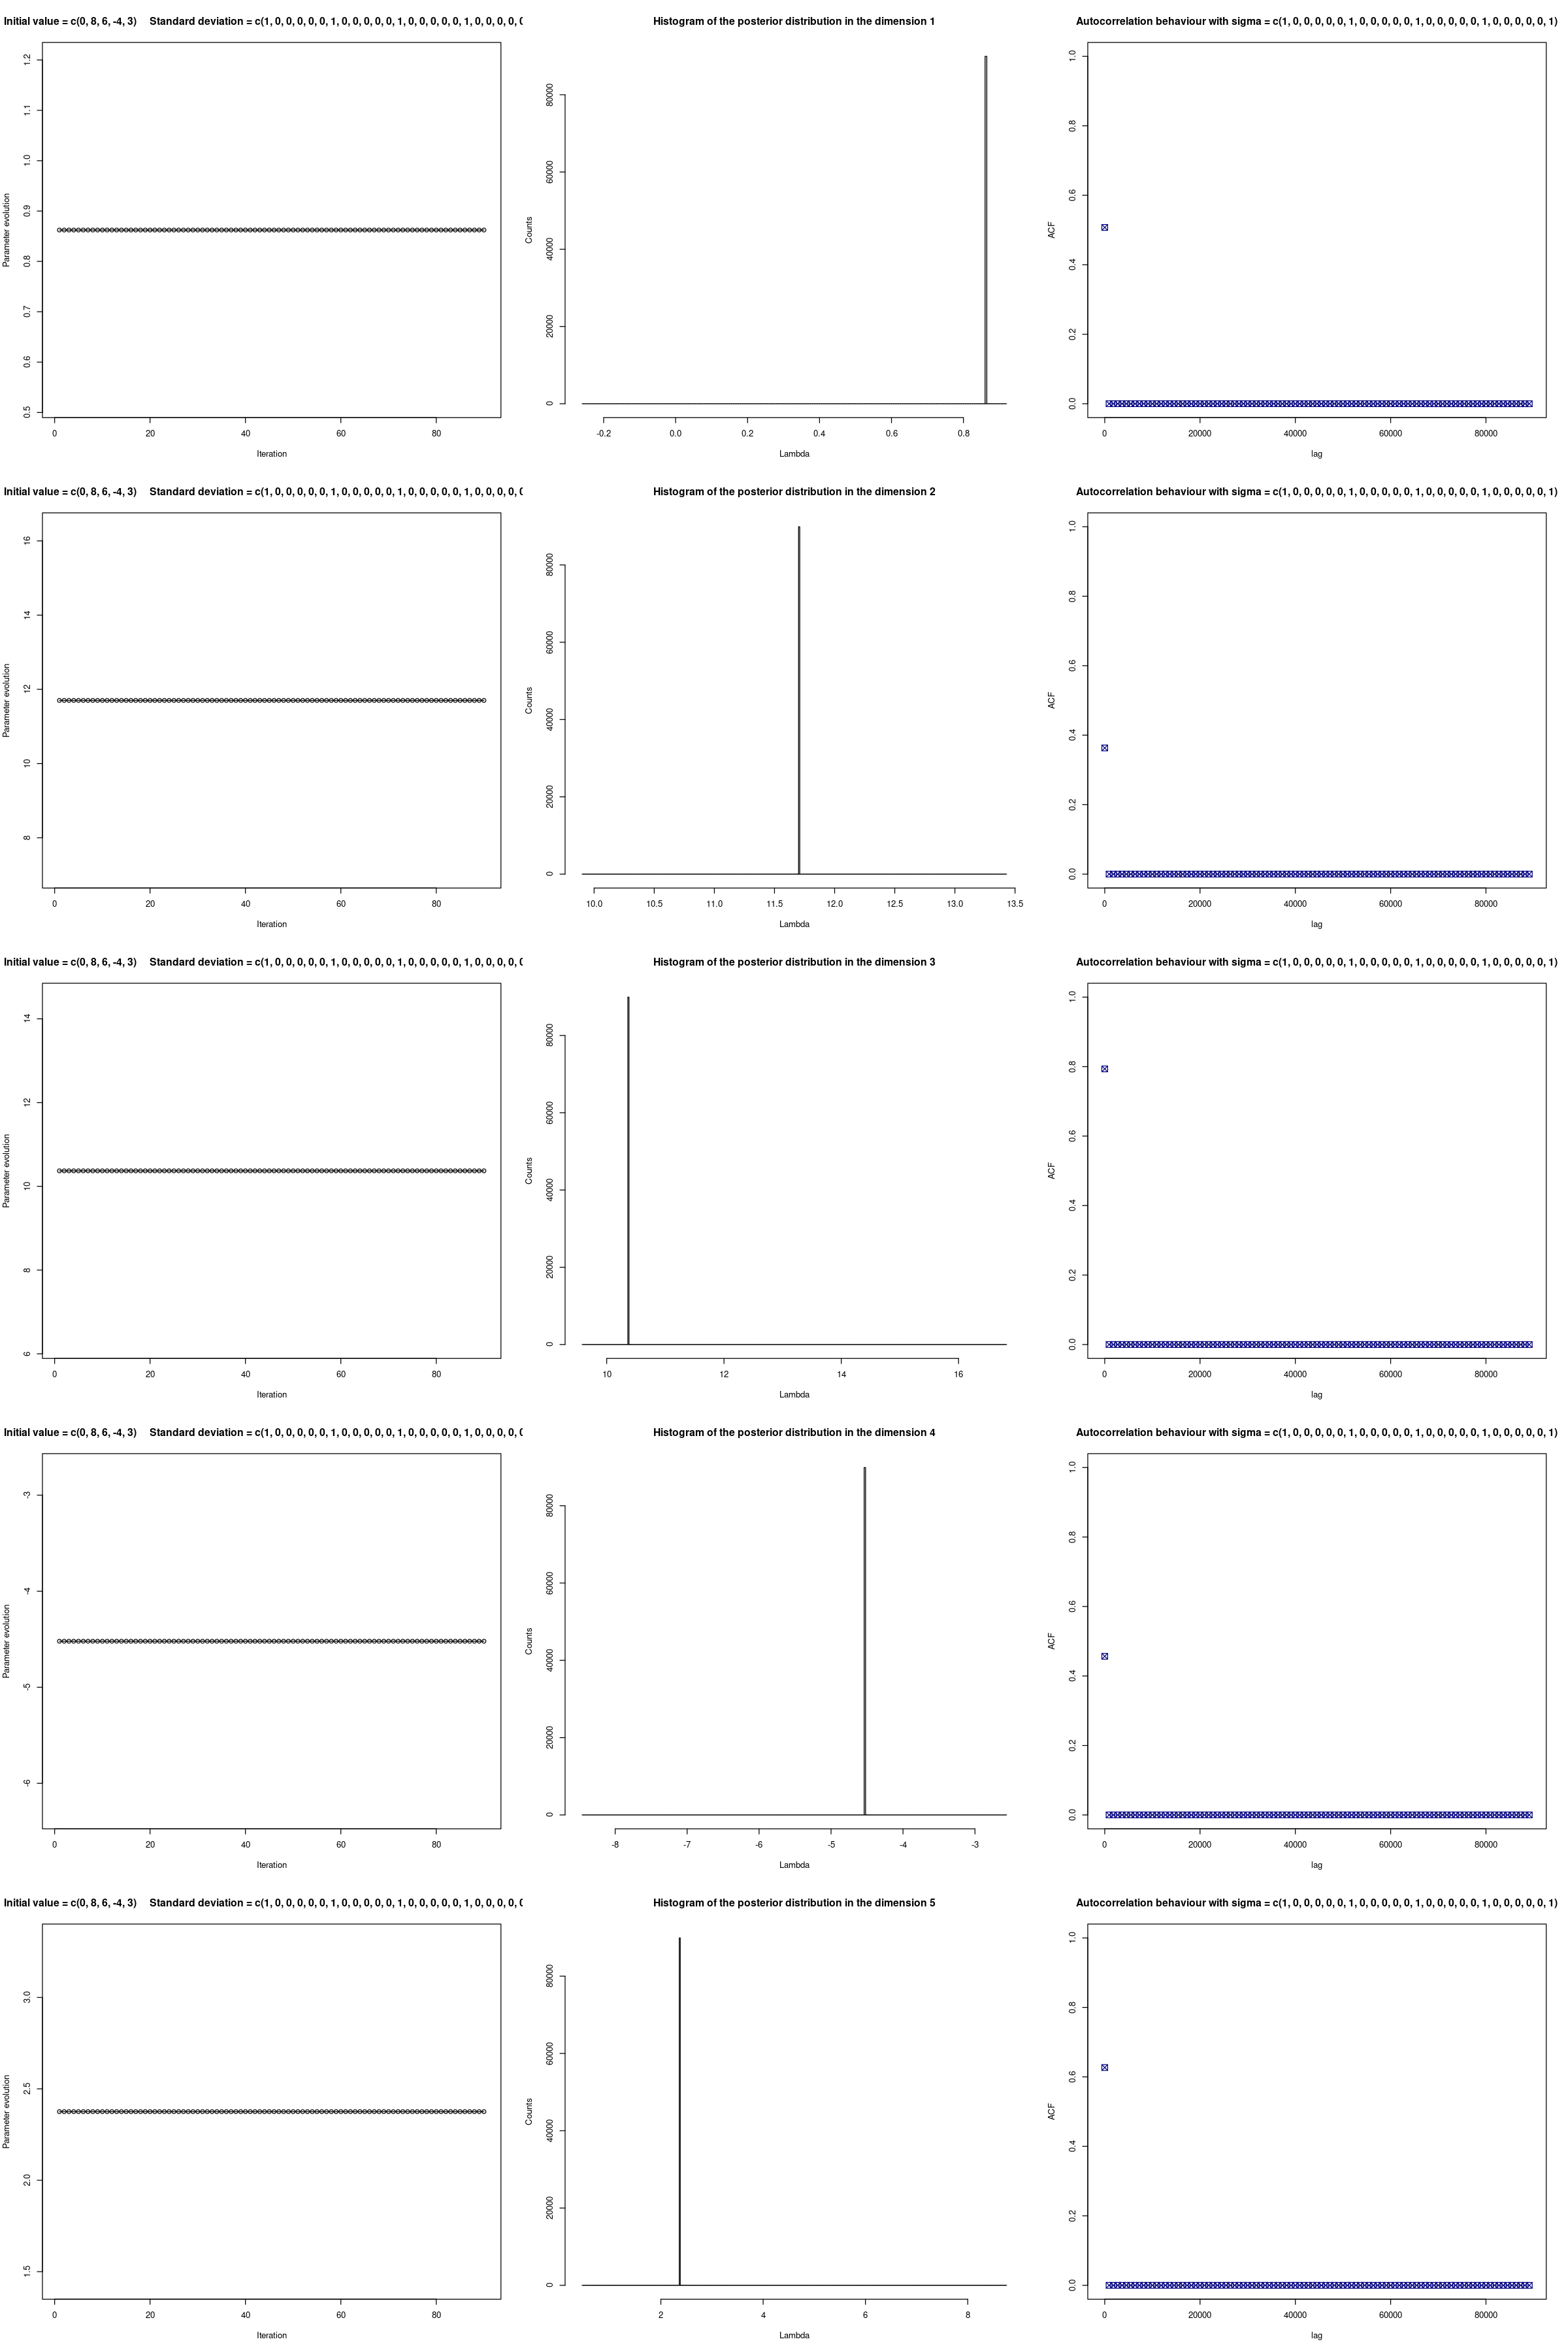

In [13]:
# GLOBAL

init = c(0, 8, 6, -4, 3)

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  71.00909 %
Final mean =  0.6780523 8.914878 6.561232 -4.82398 2.942734 
Final lambda =  -1.487535 
Final covariance matrix = 
           [,1]       [,2]        [,3]       [,4]       [,5]
[1,]  3.8354127 -0.4428694   1.7927070 -0.1138077  0.1753469
[2,] -0.4428694  8.4905404  -0.6088868  0.6361669 -0.9013379
[3,]  1.7927070 -0.6088868 243.3129861 -1.3691554  7.1853710
[4,] -0.1138077  0.6361669  -1.3691554  5.4234635 -0.1146974
[5,]  0.1753469 -0.9013379   7.1853710 -0.1146974 12.4959357


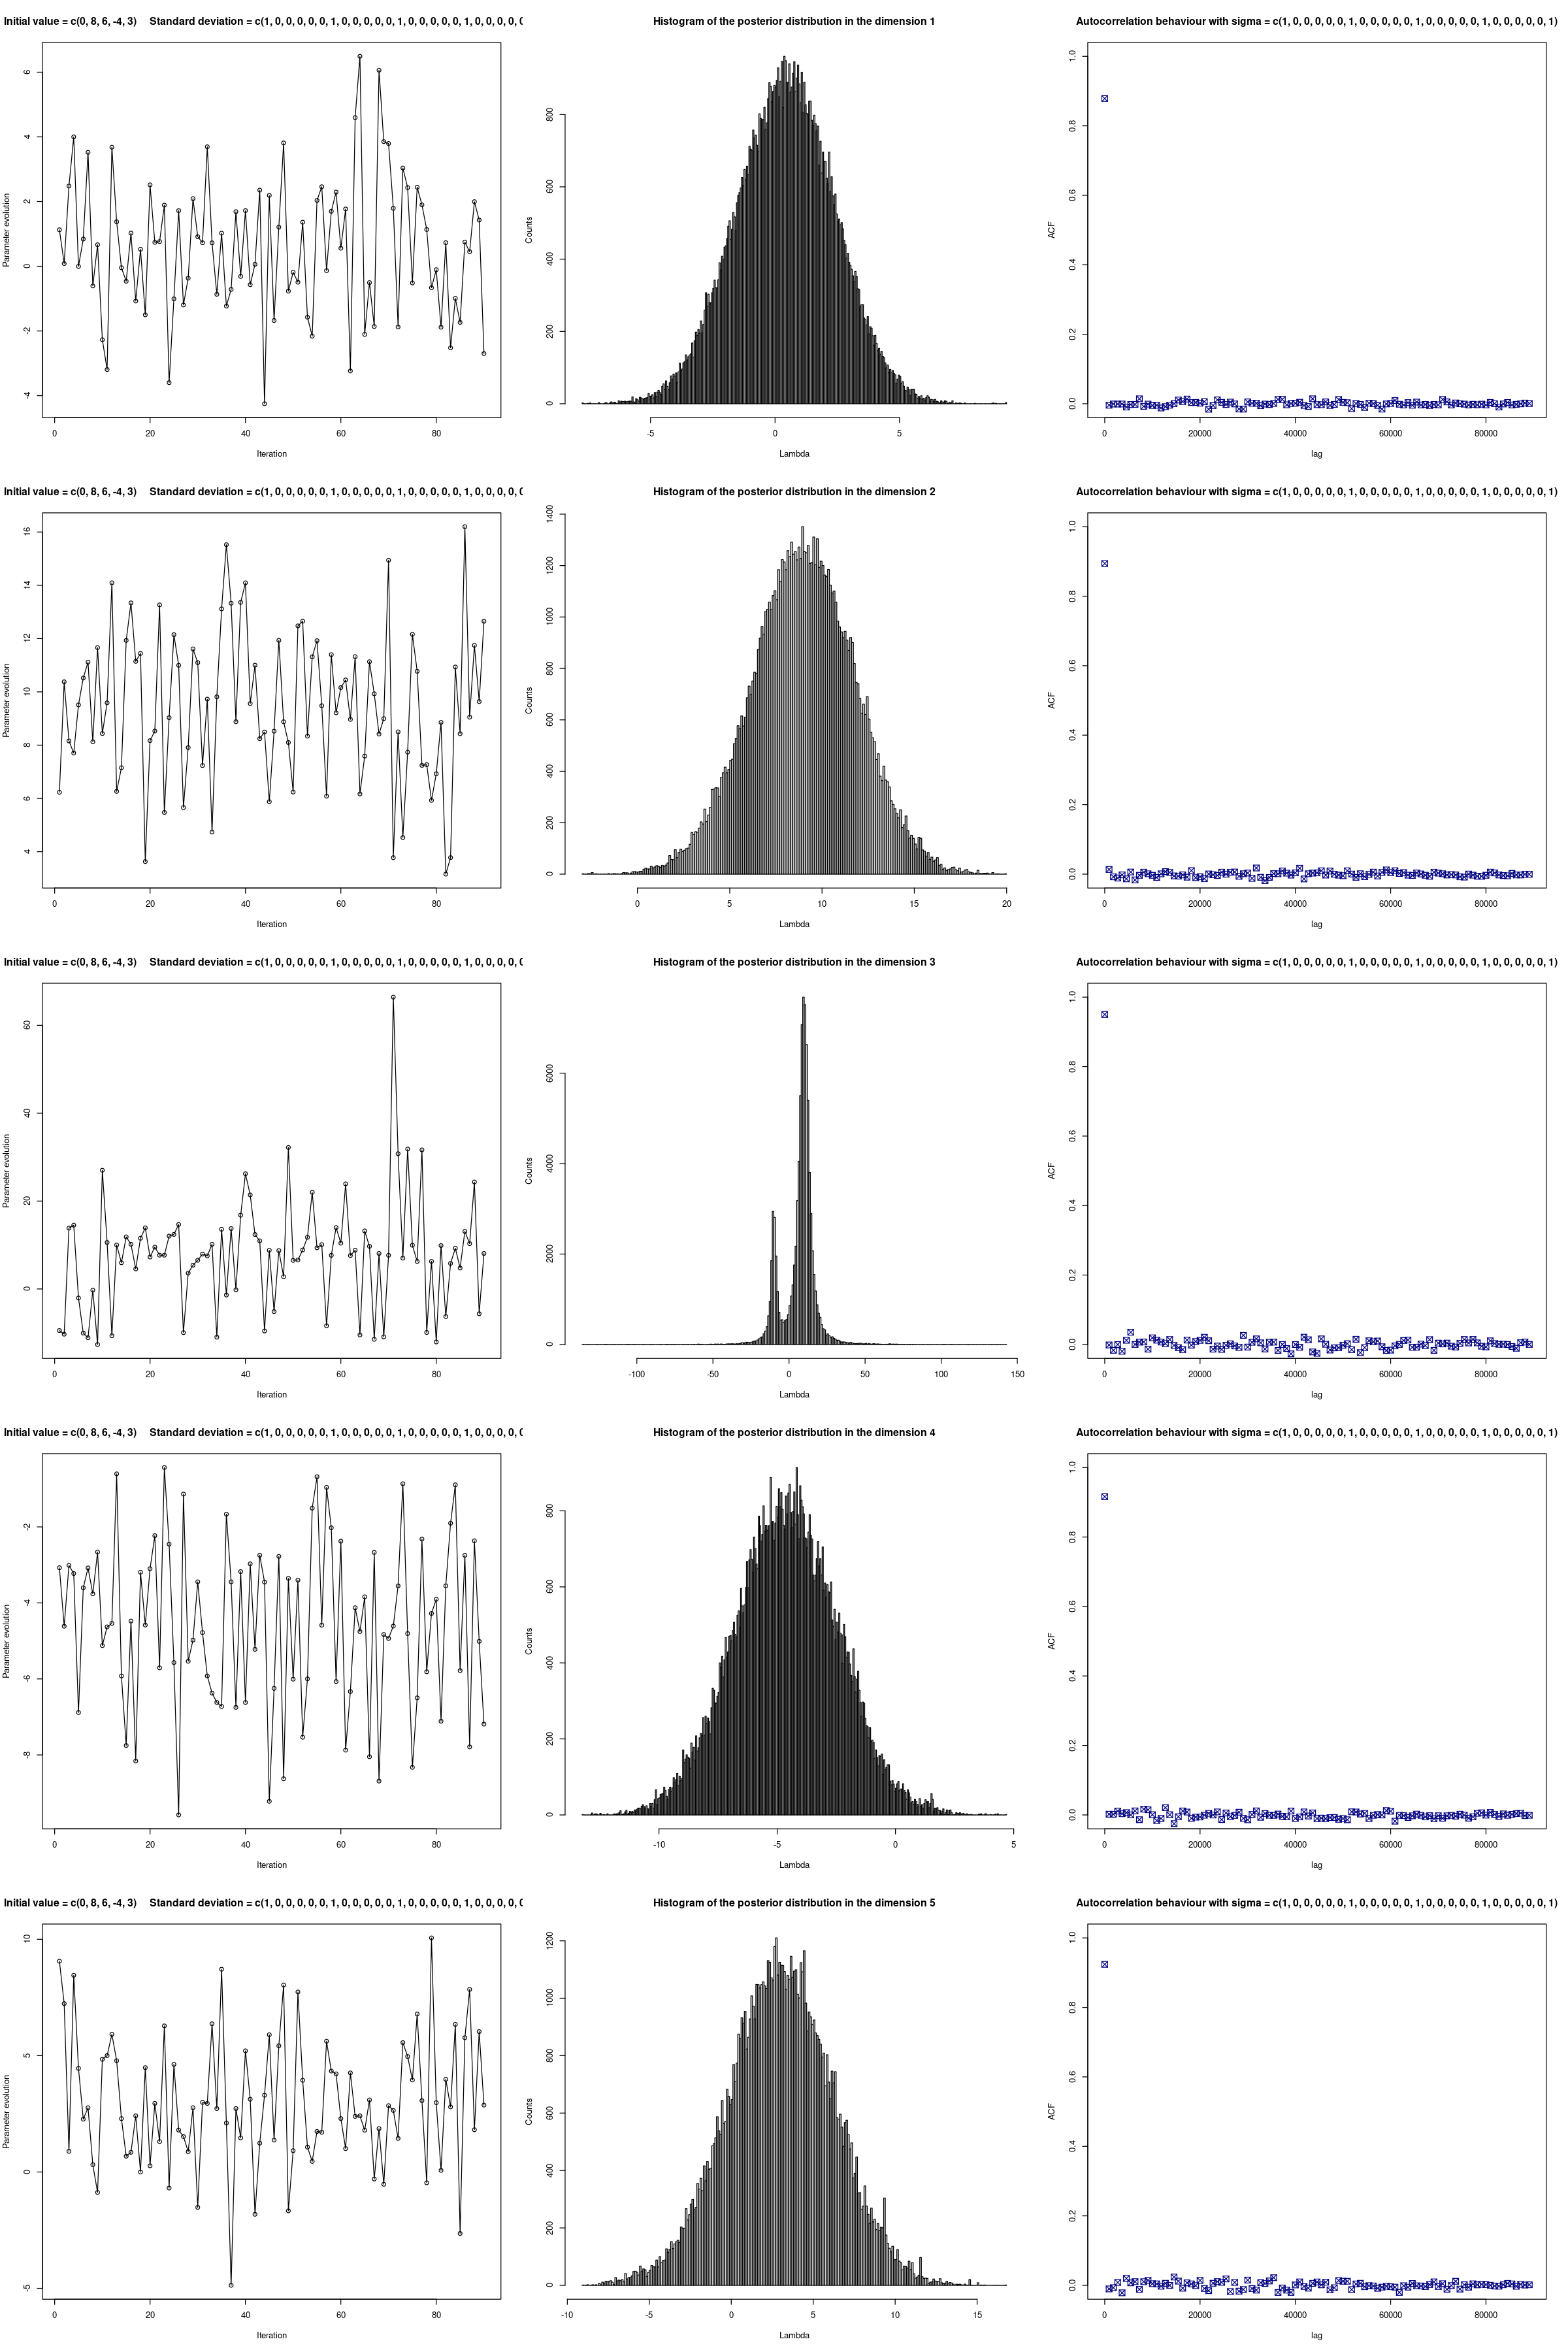

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)